In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from scipy import stats

df = pd.read_csv('superstore_data.csv')

df.head()

#Here the explanation about the variables:

Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

ID - Unique ID of each customer

Year_Birth - Age of the customer

Complain - 1 if the customer complained in the last 2 years

Dt_Customer - date of customer's enrollment with the company

Education - customer's level of education

Marital - customer's marital status

Kidhome - number of small children in customer's household

Teenhome - number of teenagers in customer's household

Income - customer's yearly household income

MntFishProducts - the amount spent on fish products in the last 2 years

MntMeatProducts - the amount spent on meat products in the last 2 years

MntFruits - the amount spent on fruits products in the last 2 years

MntSweetProducts - amount spent on sweet products in the last 2 years

MntWines - the amount spent on wine products in the last 2 years

MntGoldProds - the amount spent on gold products in the last 2 years

NumDealsPurchases - number of purchases made with discount

NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

NumStorePurchases - number of purchases made directly in stores

NumWebPurchases - number of purchases made through the company's website

NumWebVisitsMonth - number of visits to company's website in the last month

Recency - number of days since the last purchase

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   float64
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   float64
 9   MntFruits            2240 non-null   float64
 10  MntFishProducts      2240 non-null   float64
 11  MntSweetProducts     2240 non-null   float64
 12  MntGoldProds         2240 non-null   float64
 13  NumDealsPurchases    2240 non-null   float64
 14  NumWebPurchases      2240 non-null   float64
 15  NumCatalogPurchases  2240 non-null   f

In [58]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.903125,51158.782589,0.444196,0.506250,49.109375,9.368304,8.562946,8.973214,30.015625,2.062054,4.046429,2.541964,5.790179,5.274107,0.149107,0.009375
std,3246.662198,11.694144,21061.004907,0.538398,0.544538,28.962453,10.488581,6.133658,9.896435,28.751608,1.340004,2.625941,2.630095,3.250958,2.303046,0.356274,0.096391
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,1.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51057.000000,0.000000,0.000000,49.000000,8.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,12.000000,12.000000,11.000000,40.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,46.000000,25.000000,43.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000


In [59]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntFruits,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.903125,51158.782589,0.444196,0.506250,49.109375,9.368304,8.562946,8.973214,30.015625,2.062054,4.046429,2.541964,5.790179,5.274107,0.149107,0.009375
std,3246.662198,11.694144,21061.004907,0.538398,0.544538,28.962453,10.488581,6.133658,9.896435,28.751608,1.340004,2.625941,2.630095,3.250958,2.303046,0.356274,0.096391
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,34722.000000,0.000000,0.000000,24.000000,1.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51057.000000,0.000000,0.000000,49.000000,8.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68098.250000,1.000000,1.000000,74.000000,12.000000,12.000000,11.000000,40.250000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,113734.000000,2.000000,2.000000,99.000000,46.000000,25.000000,43.000000,126.000000,6.000000,11.000000,10.000000,13.000000,13.000000,1.000000,1.000000


In [60]:
df.dtypes

Id                       int64
Year_Birth             float64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                float64
MntFruits              float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases      float64
NumWebPurchases        float64
NumCatalogPurchases    float64
NumStorePurchases      float64
NumWebVisitsMonth      float64
Response                 int64
Complain                 int64
dtype: object

In [62]:
df['Income']=df['Income'].fillna(df['Income'].mode()[0])

In [63]:
(df.isnull().sum()/len(df))

Id                     0.0
Year_Birth             0.0
Education              0.0
Marital_Status         0.0
Income                 0.0
Kidhome                0.0
Teenhome               0.0
Dt_Customer            0.0
Recency                0.0
MntFruits              0.0
MntFishProducts        0.0
MntSweetProducts       0.0
MntGoldProds           0.0
NumDealsPurchases      0.0
NumWebPurchases        0.0
NumCatalogPurchases    0.0
NumStorePurchases      0.0
NumWebVisitsMonth      0.0
Response               0.0
Complain               0.0
dtype: float64

In [64]:
# List of numerical features
outcol = ['Year_Birth', 'Income', 'MntFishProducts', 'MntFruits', 
                     'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 
                     'NumCatalogPurchases', 'NumStorePurchases', 'NumWebPurchases', 
                     'NumWebVisitsMonth', 'Recency']

# Replace outliers with median
for column in outcol:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    median = df[column].median()
    
    df[column] = np.where(((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))), median, df[column])


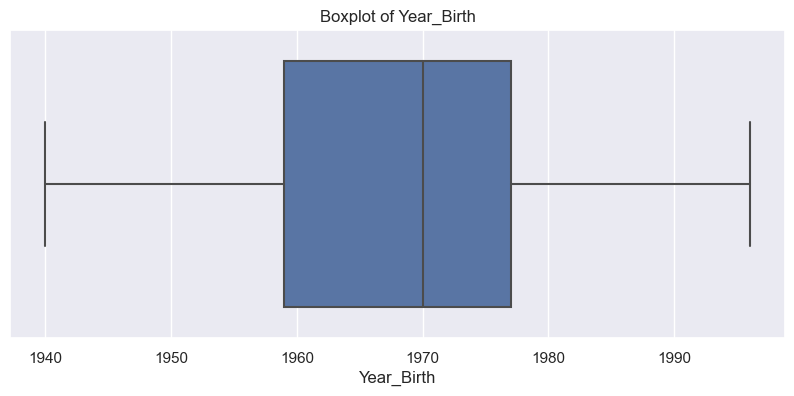

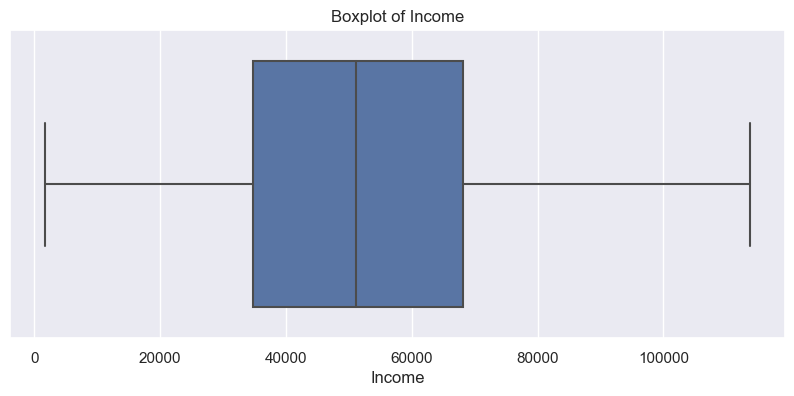

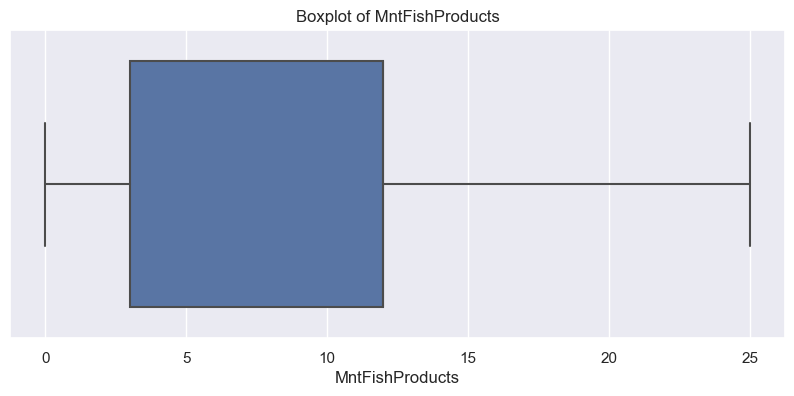

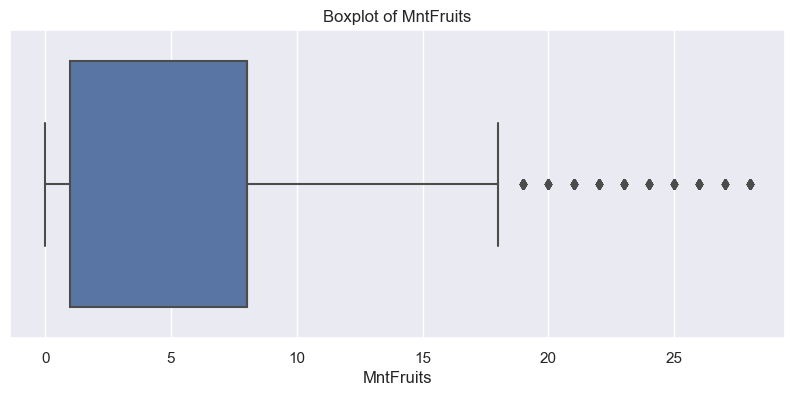

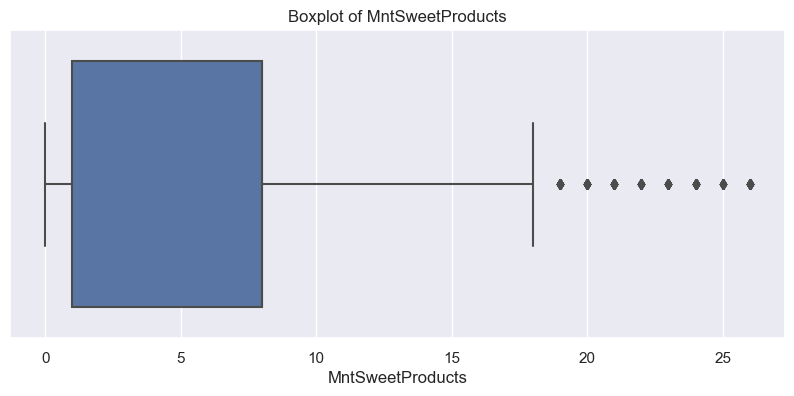

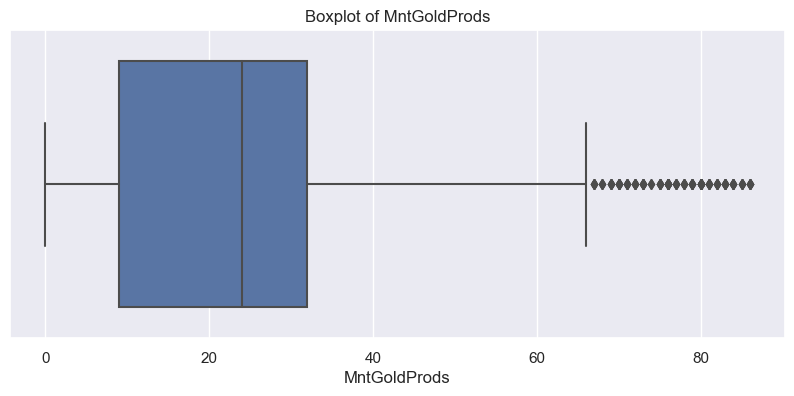

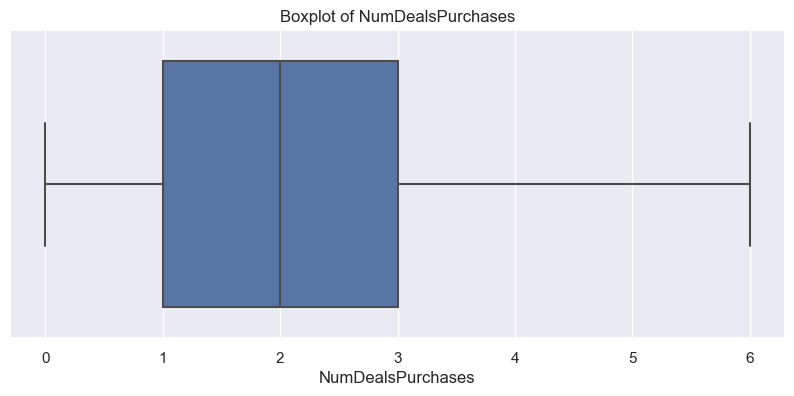

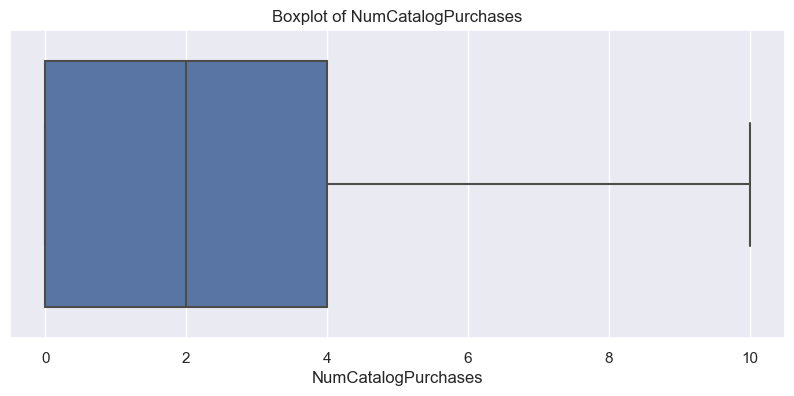

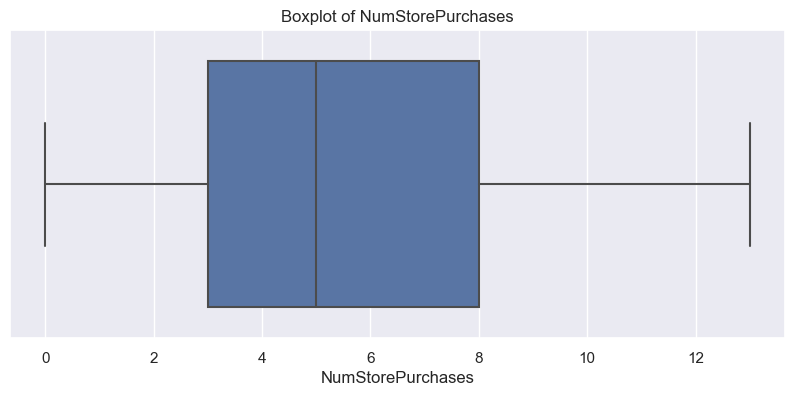

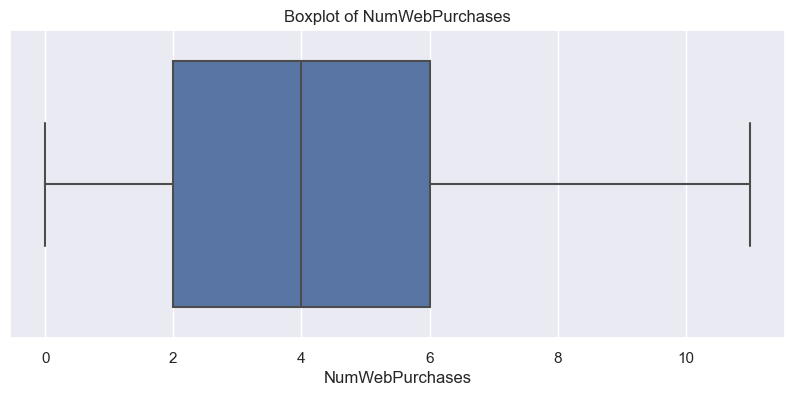

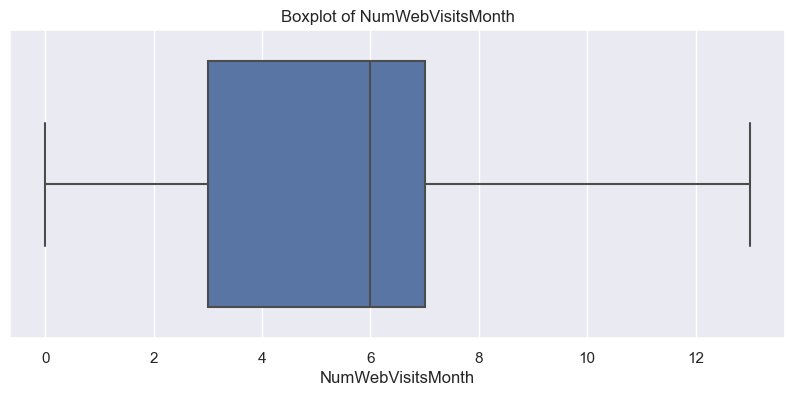

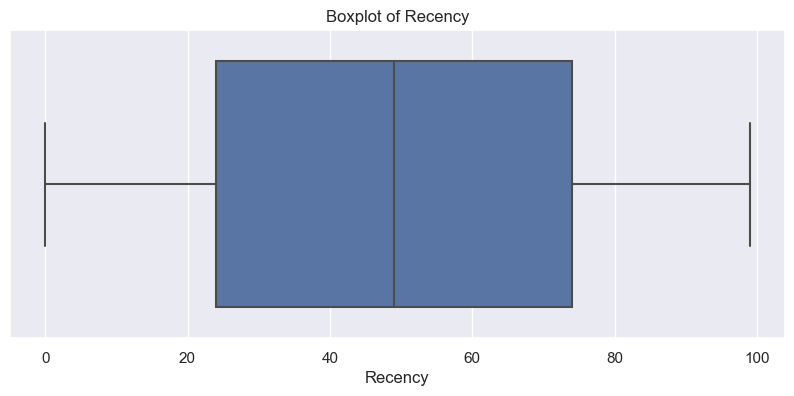

In [82]:


# Plot boxplots for each numerical feature
for column in outcol:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


# UNIVARIATE ANALYSIS

<Axes: title={'center': 'Variable Complain'}, xlabel='Complain', ylabel='count'>

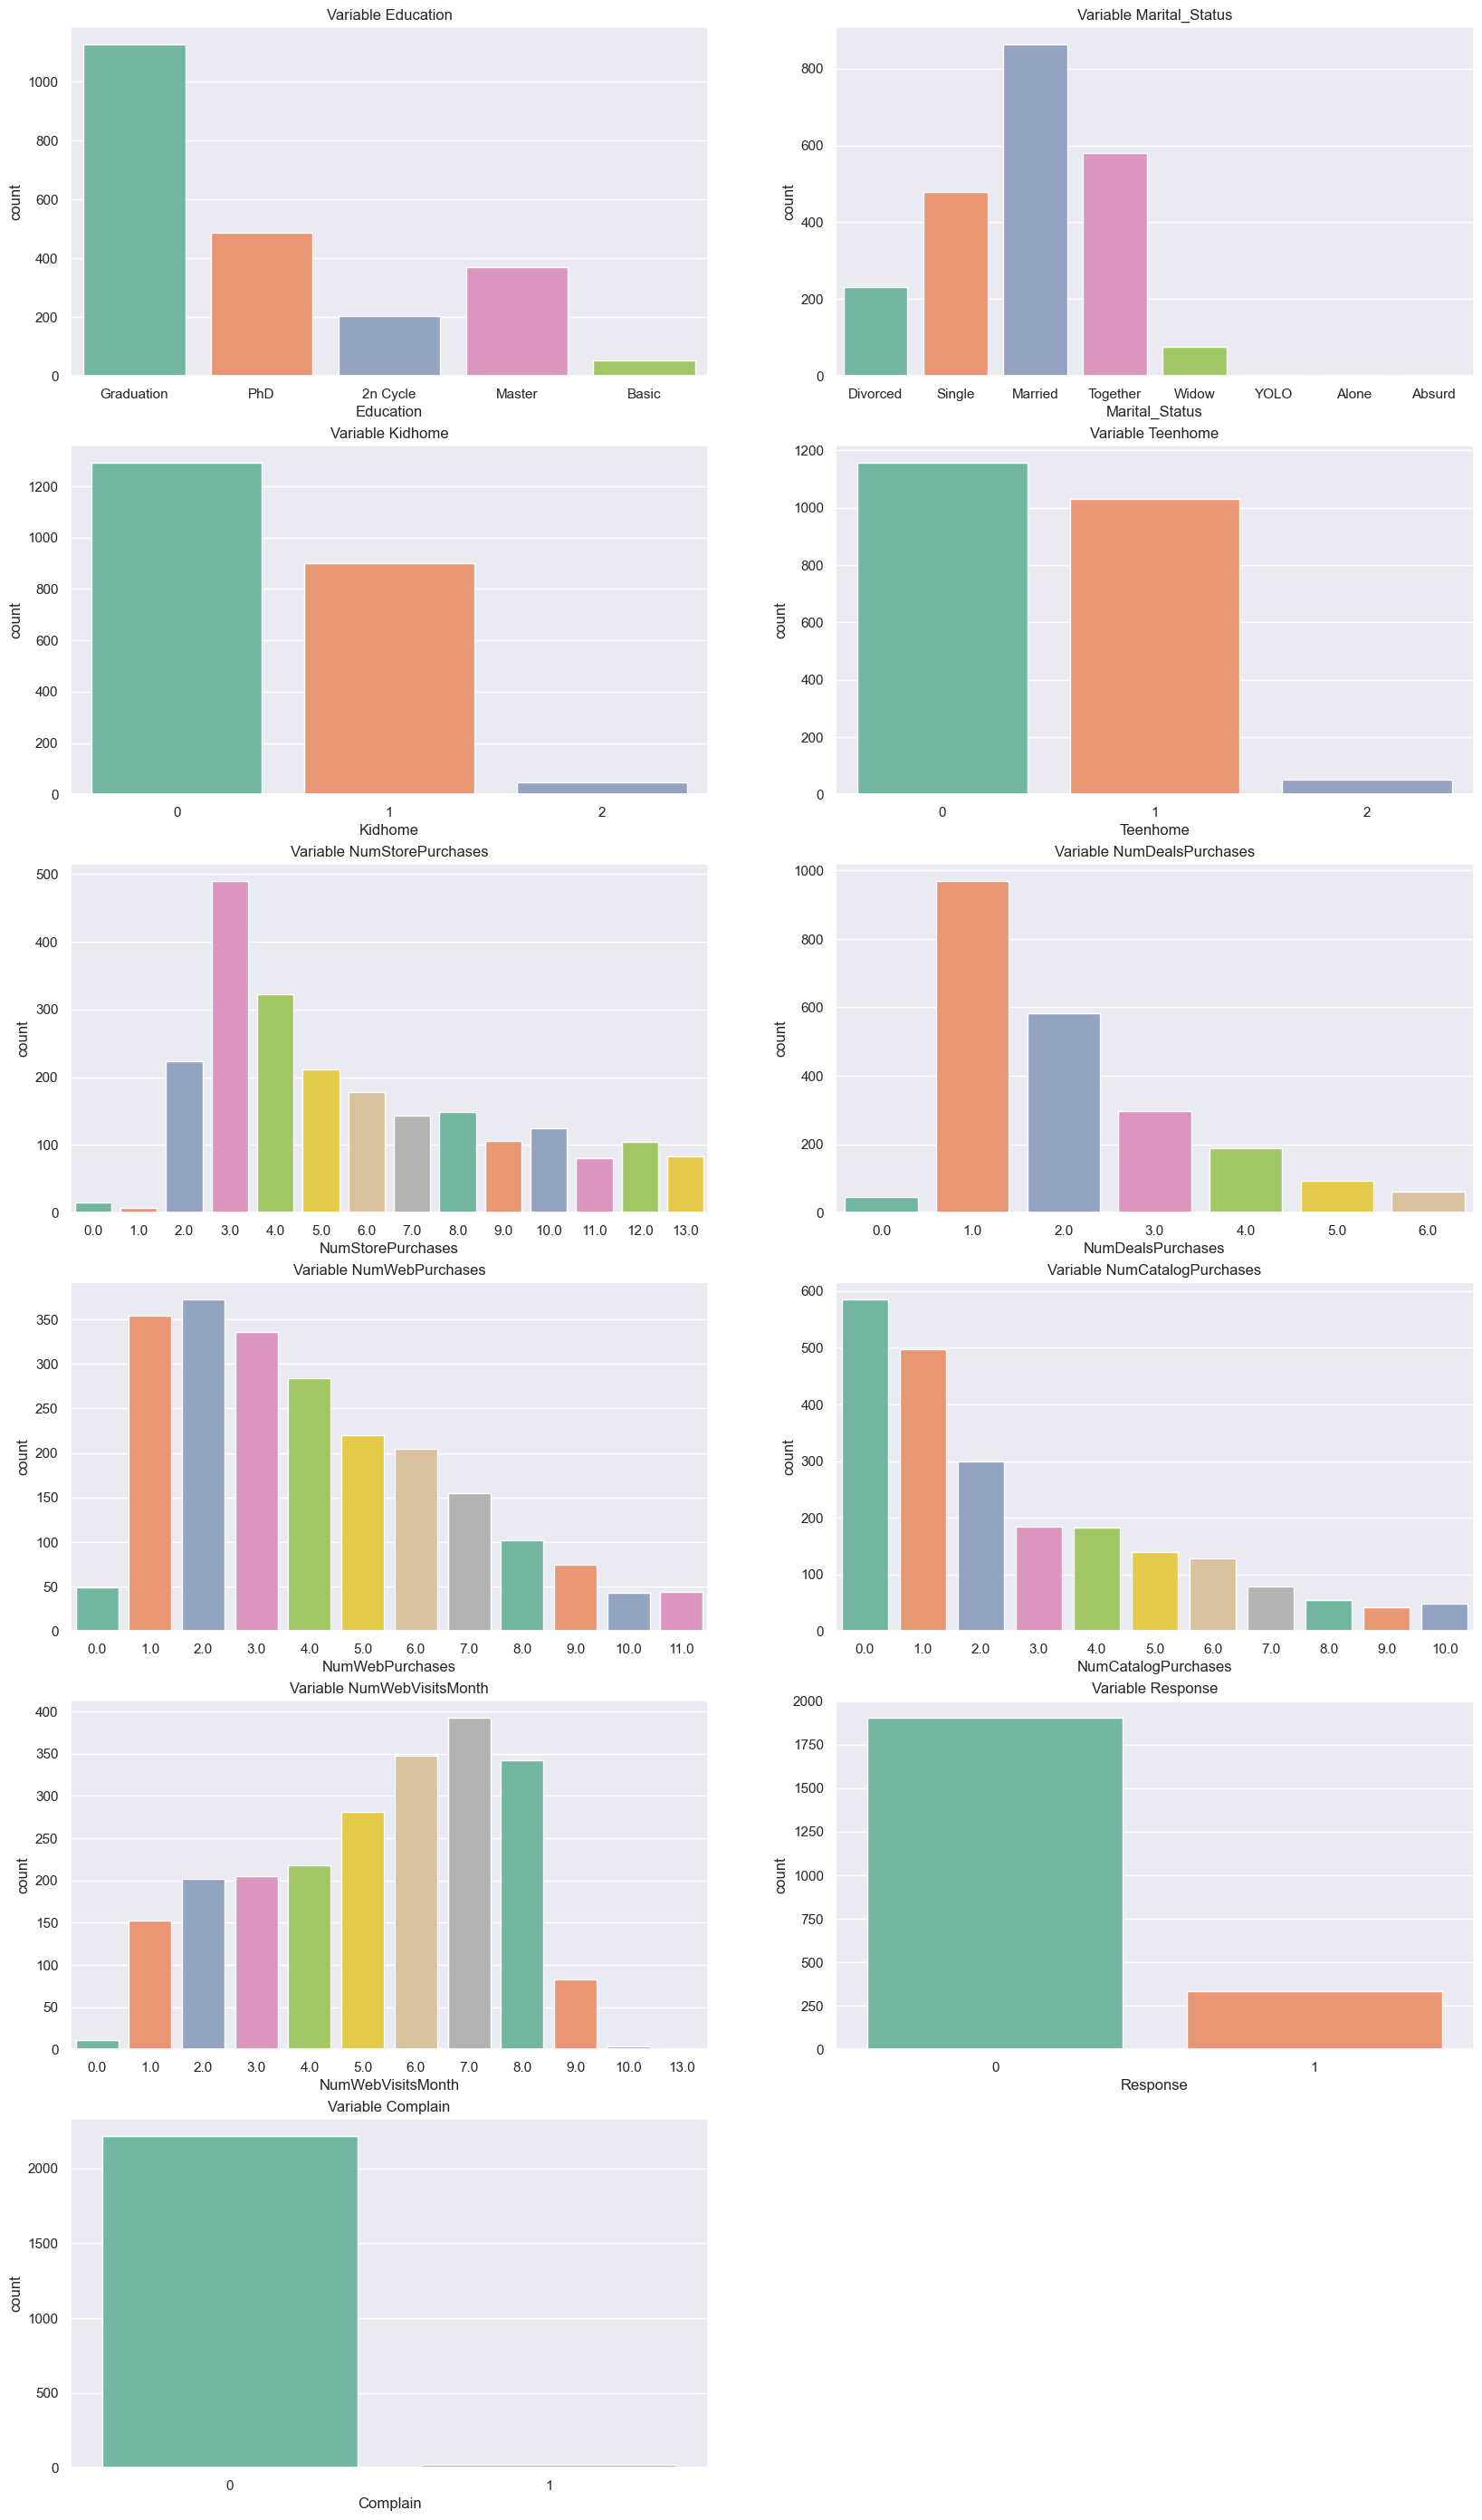

In [85]:
plt.figure(figsize = (20,35))

plt.subplot(6,2,1)
plt.gca().set_title('Variable Education')
sns.countplot(x = 'Education', palette = 'Set2', data = df)

plt.subplot(6,2,2)
plt.gca().set_title('Variable Marital_Status')
sns.countplot(x = 'Marital_Status', palette = 'Set2', data = df)

plt.subplot(6,2,3)
plt.gca().set_title('Variable Kidhome')
sns.countplot(x = 'Kidhome', palette = 'Set2', data = df)

plt.subplot(6,2,4)
plt.gca().set_title('Variable Teenhome')
sns.countplot(x = 'Teenhome', palette = 'Set2', data = df)

plt.subplot(6,2,5)
plt.gca().set_title('Variable NumStorePurchases')
sns.countplot(x = 'NumStorePurchases', palette = 'Set2', data = df)

plt.subplot(6,2,6)
plt.gca().set_title('Variable NumDealsPurchases')
sns.countplot(x = 'NumDealsPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,7)
plt.gca().set_title('Variable NumWebPurchases')
sns.countplot(x = 'NumWebPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,8)
plt.gca().set_title('Variable NumCatalogPurchases')
sns.countplot(x = 'NumCatalogPurchases', palette = 'Set2', data = df)

plt.subplot(6,2,9)
plt.gca().set_title('Variable NumWebVisitsMonth')
sns.countplot(x = 'NumWebVisitsMonth', palette = 'Set2', data = df)

plt.subplot(6,2,10)
plt.gca().set_title('Variable Response')
sns.countplot(x = 'Response', palette = 'Set2', data = df)

plt.subplot(6,2,11)
plt.gca().set_title('Variable Complain')
sns.countplot(x = 'Complain', palette = 'Set2', data = df)

<Axes: ylabel='MntFruits'>

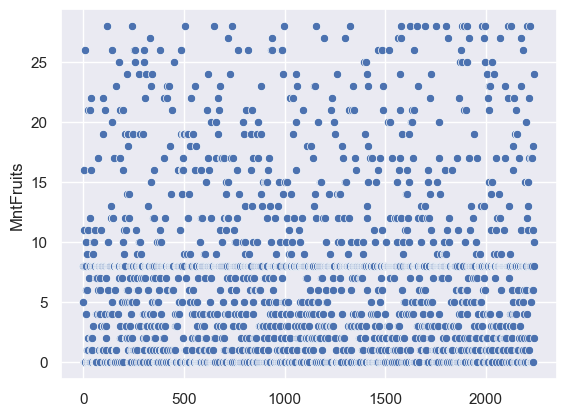

In [106]:
sns.scatterplot(df["MntFruits"])

<Axes: ylabel='MntFishProducts'>

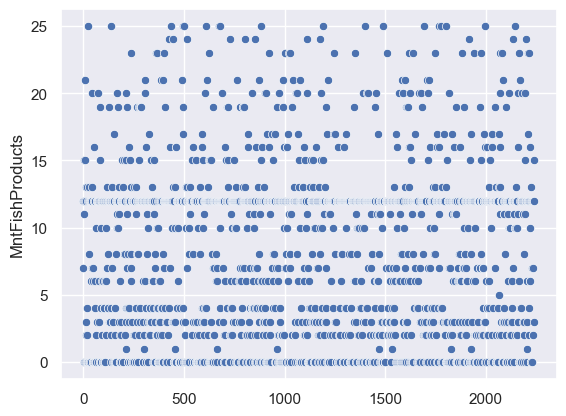

In [107]:
sns.scatterplot(df["MntFishProducts"])

<Axes: >

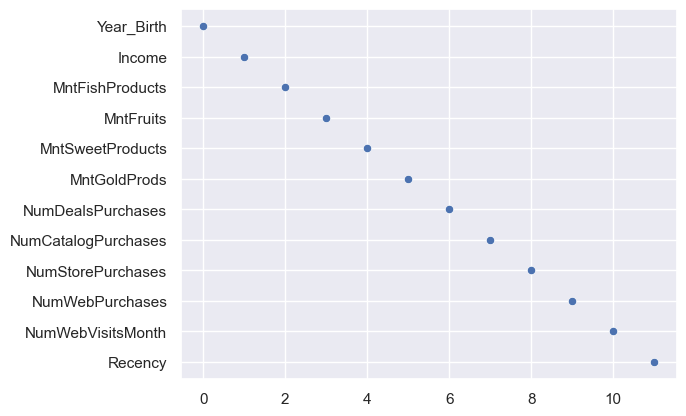

In [108]:
sns.scatterplot(outcol)

# BIVARIATE ANALYSIS

<Axes: xlabel='Complain', ylabel='count'>

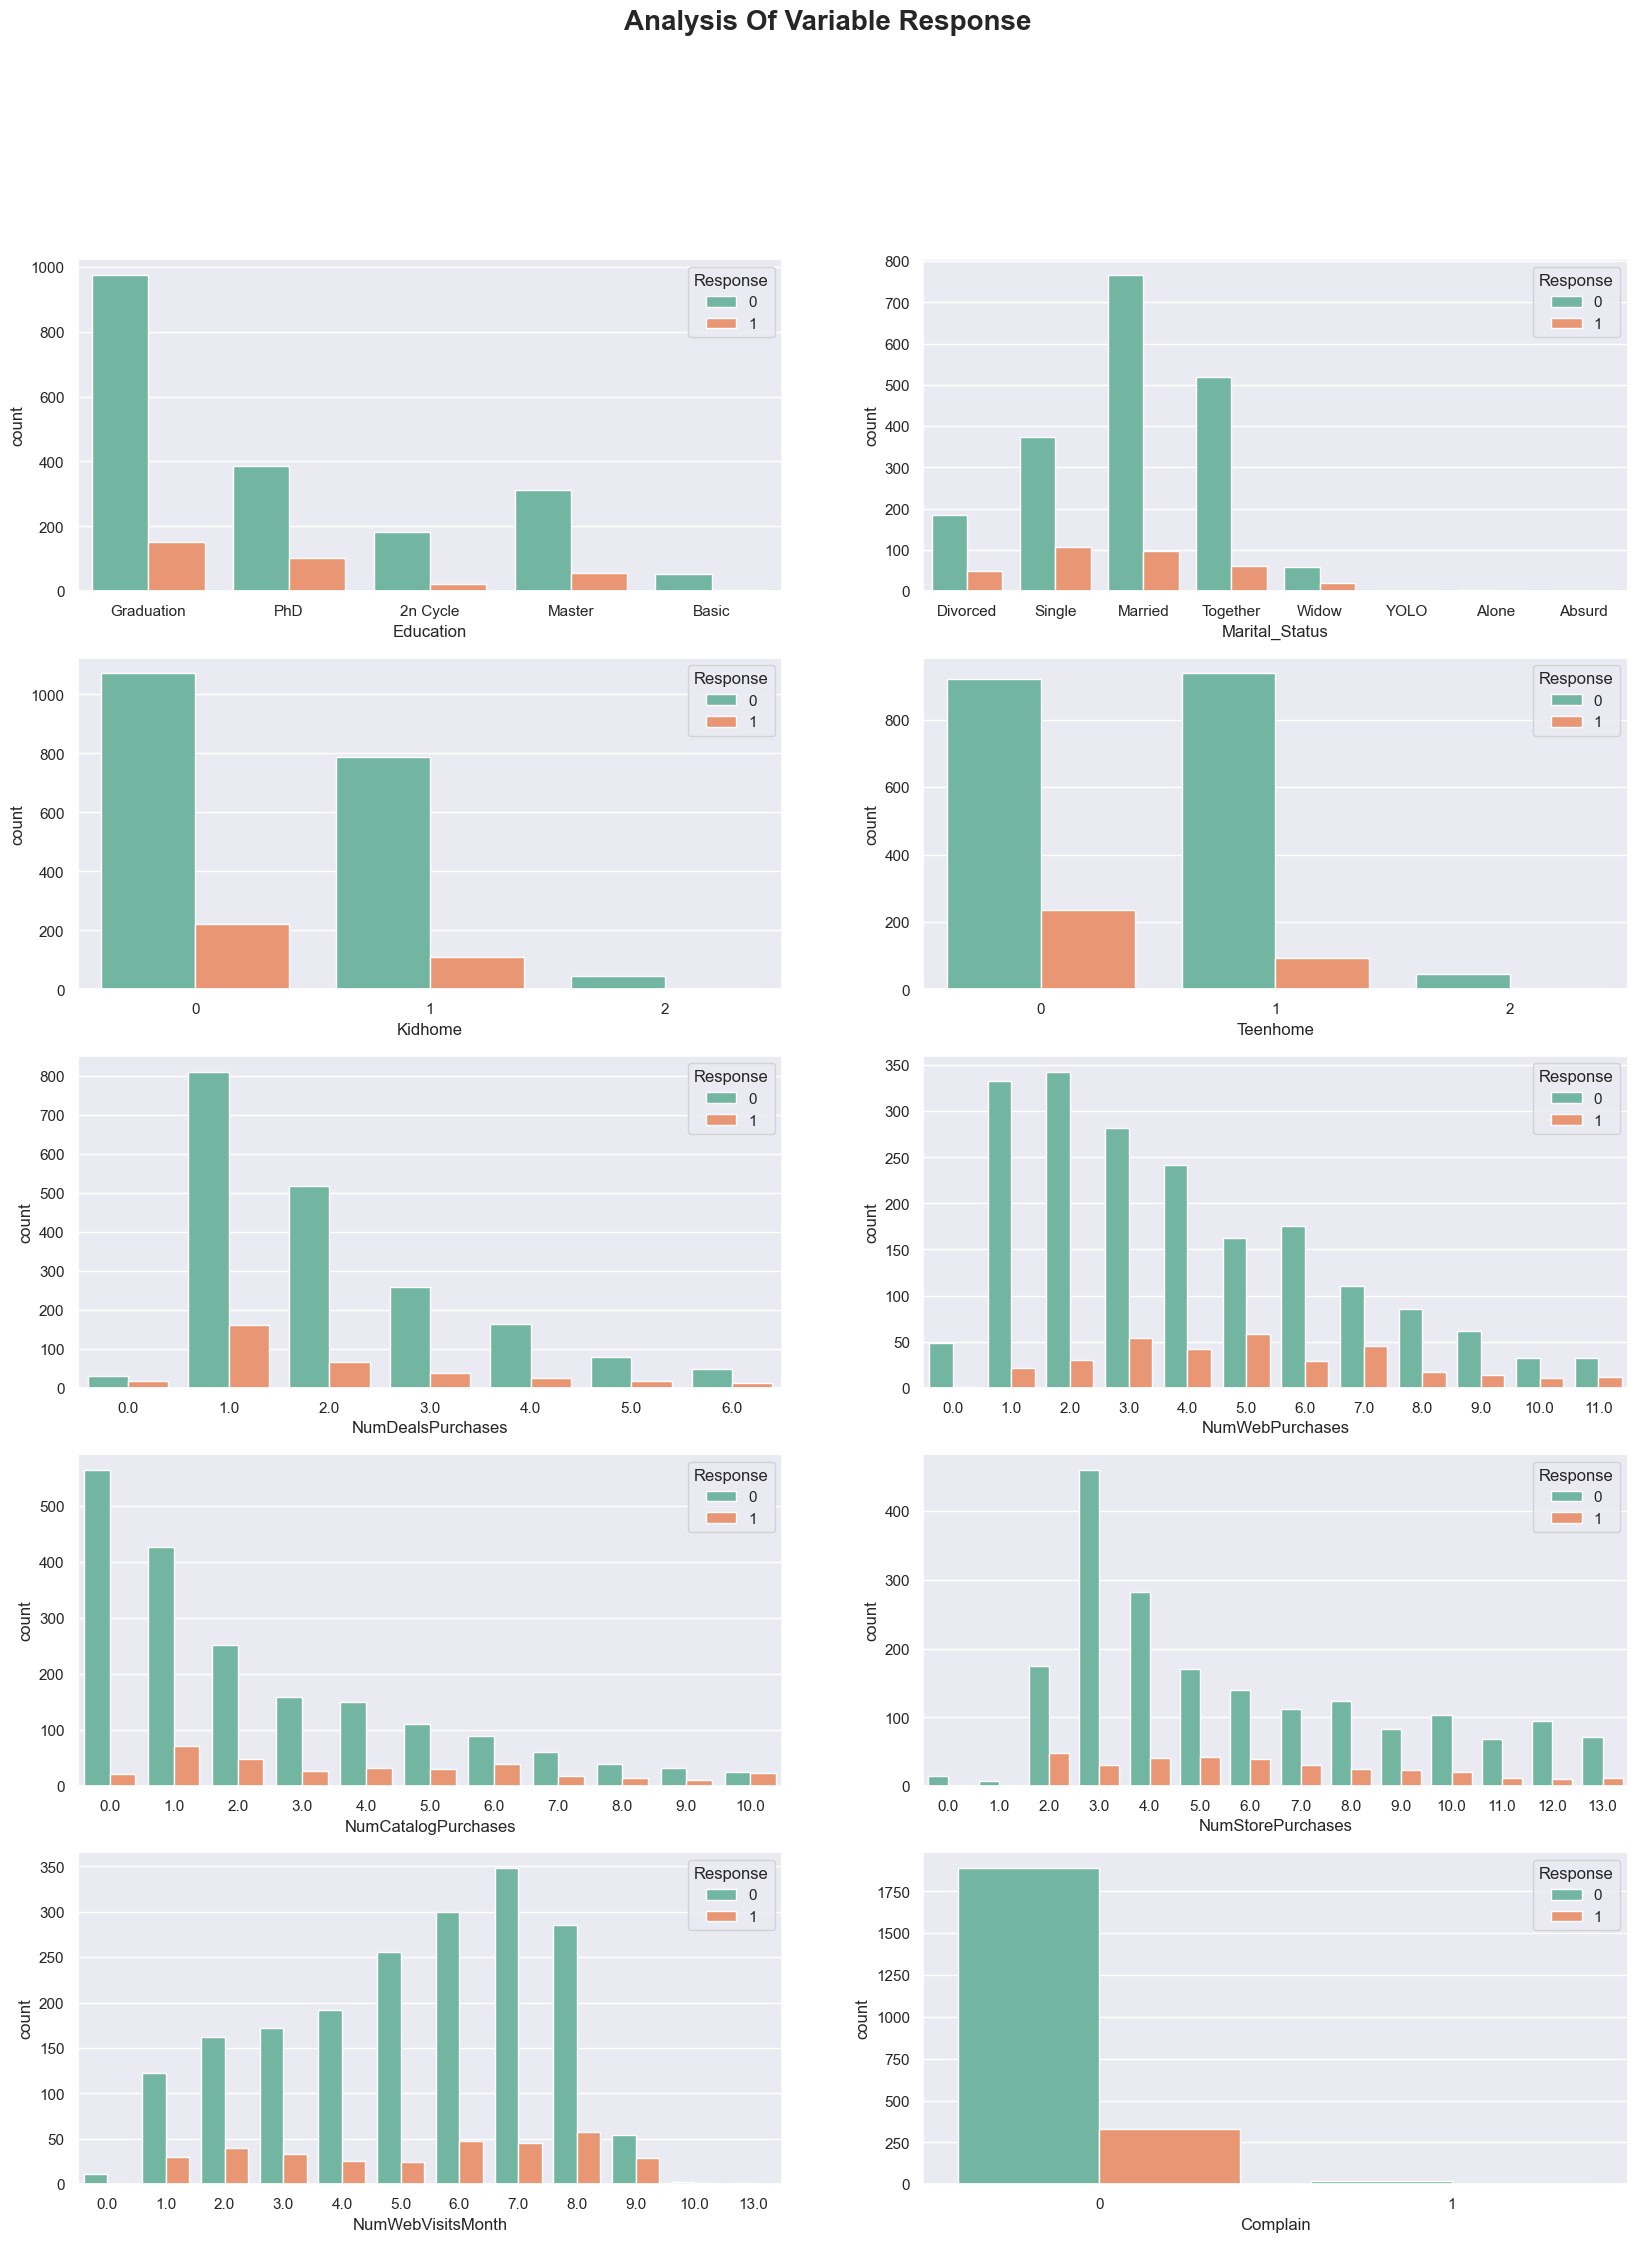

In [94]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'Education', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'Marital_Status', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'Kidhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'Teenhome', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'NumDealsPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'NumWebPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'NumCatalogPurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'NumStorePurchases', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,9)
sns.countplot(x = 'NumWebVisitsMonth', hue = 'Response', palette = 'Set2', data = df)

plt.subplot(5,2,10)
sns.countplot(x = 'Complain', hue = 'Response', palette = 'Set2', data = df)

<Axes: xlabel='Response', ylabel='MntGoldProds'>

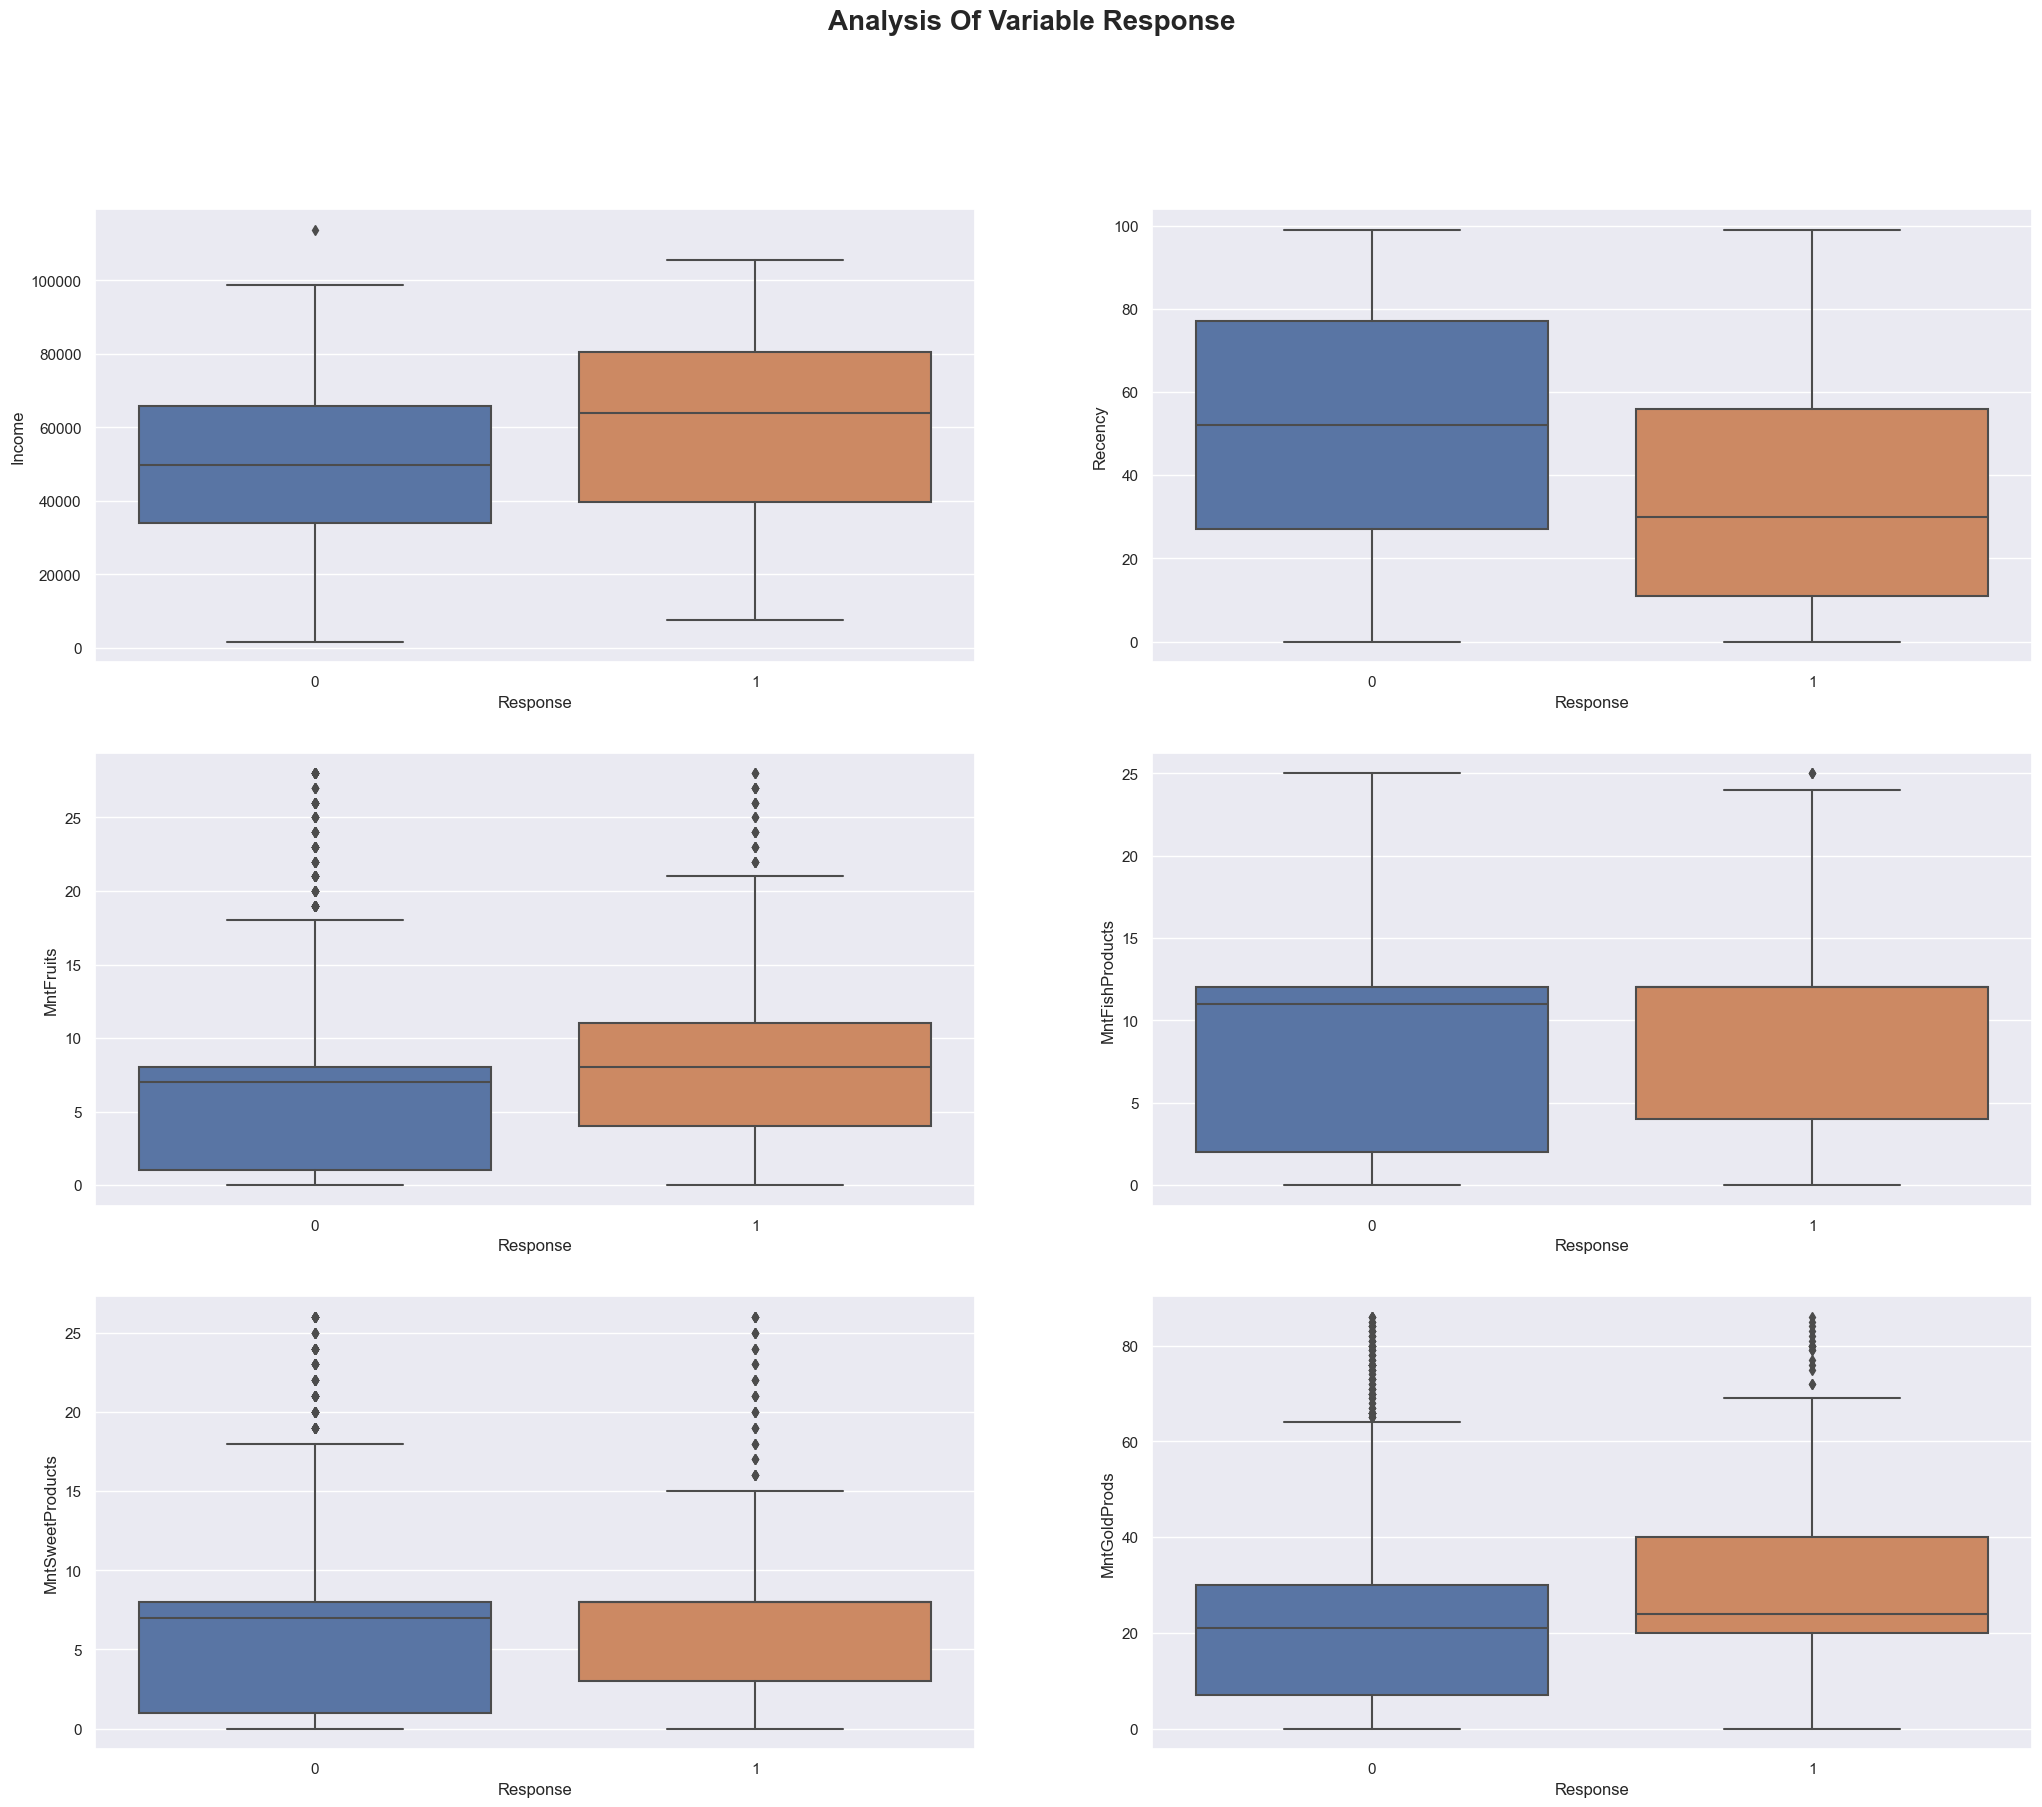

In [95]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Response",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="Response", y="Income", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="Response", y="Recency", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="Response", y="MntFruits", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="Response", y="MntFishProducts", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="Response", y="MntSweetProducts", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="Response", y="MntGoldProds", data=df)

# MULTIVARIATE ANALYSIS

<Axes: >

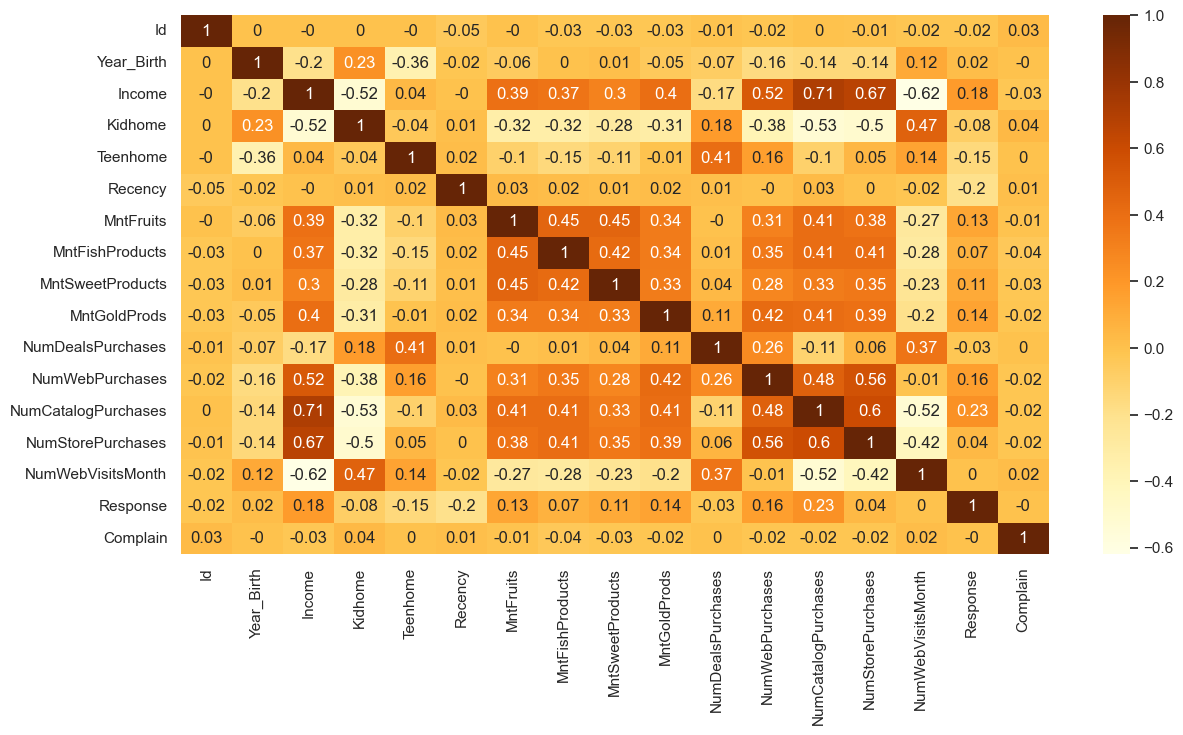

In [104]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

# Distribution

<Axes: xlabel='MntGoldProds', ylabel='Count'>

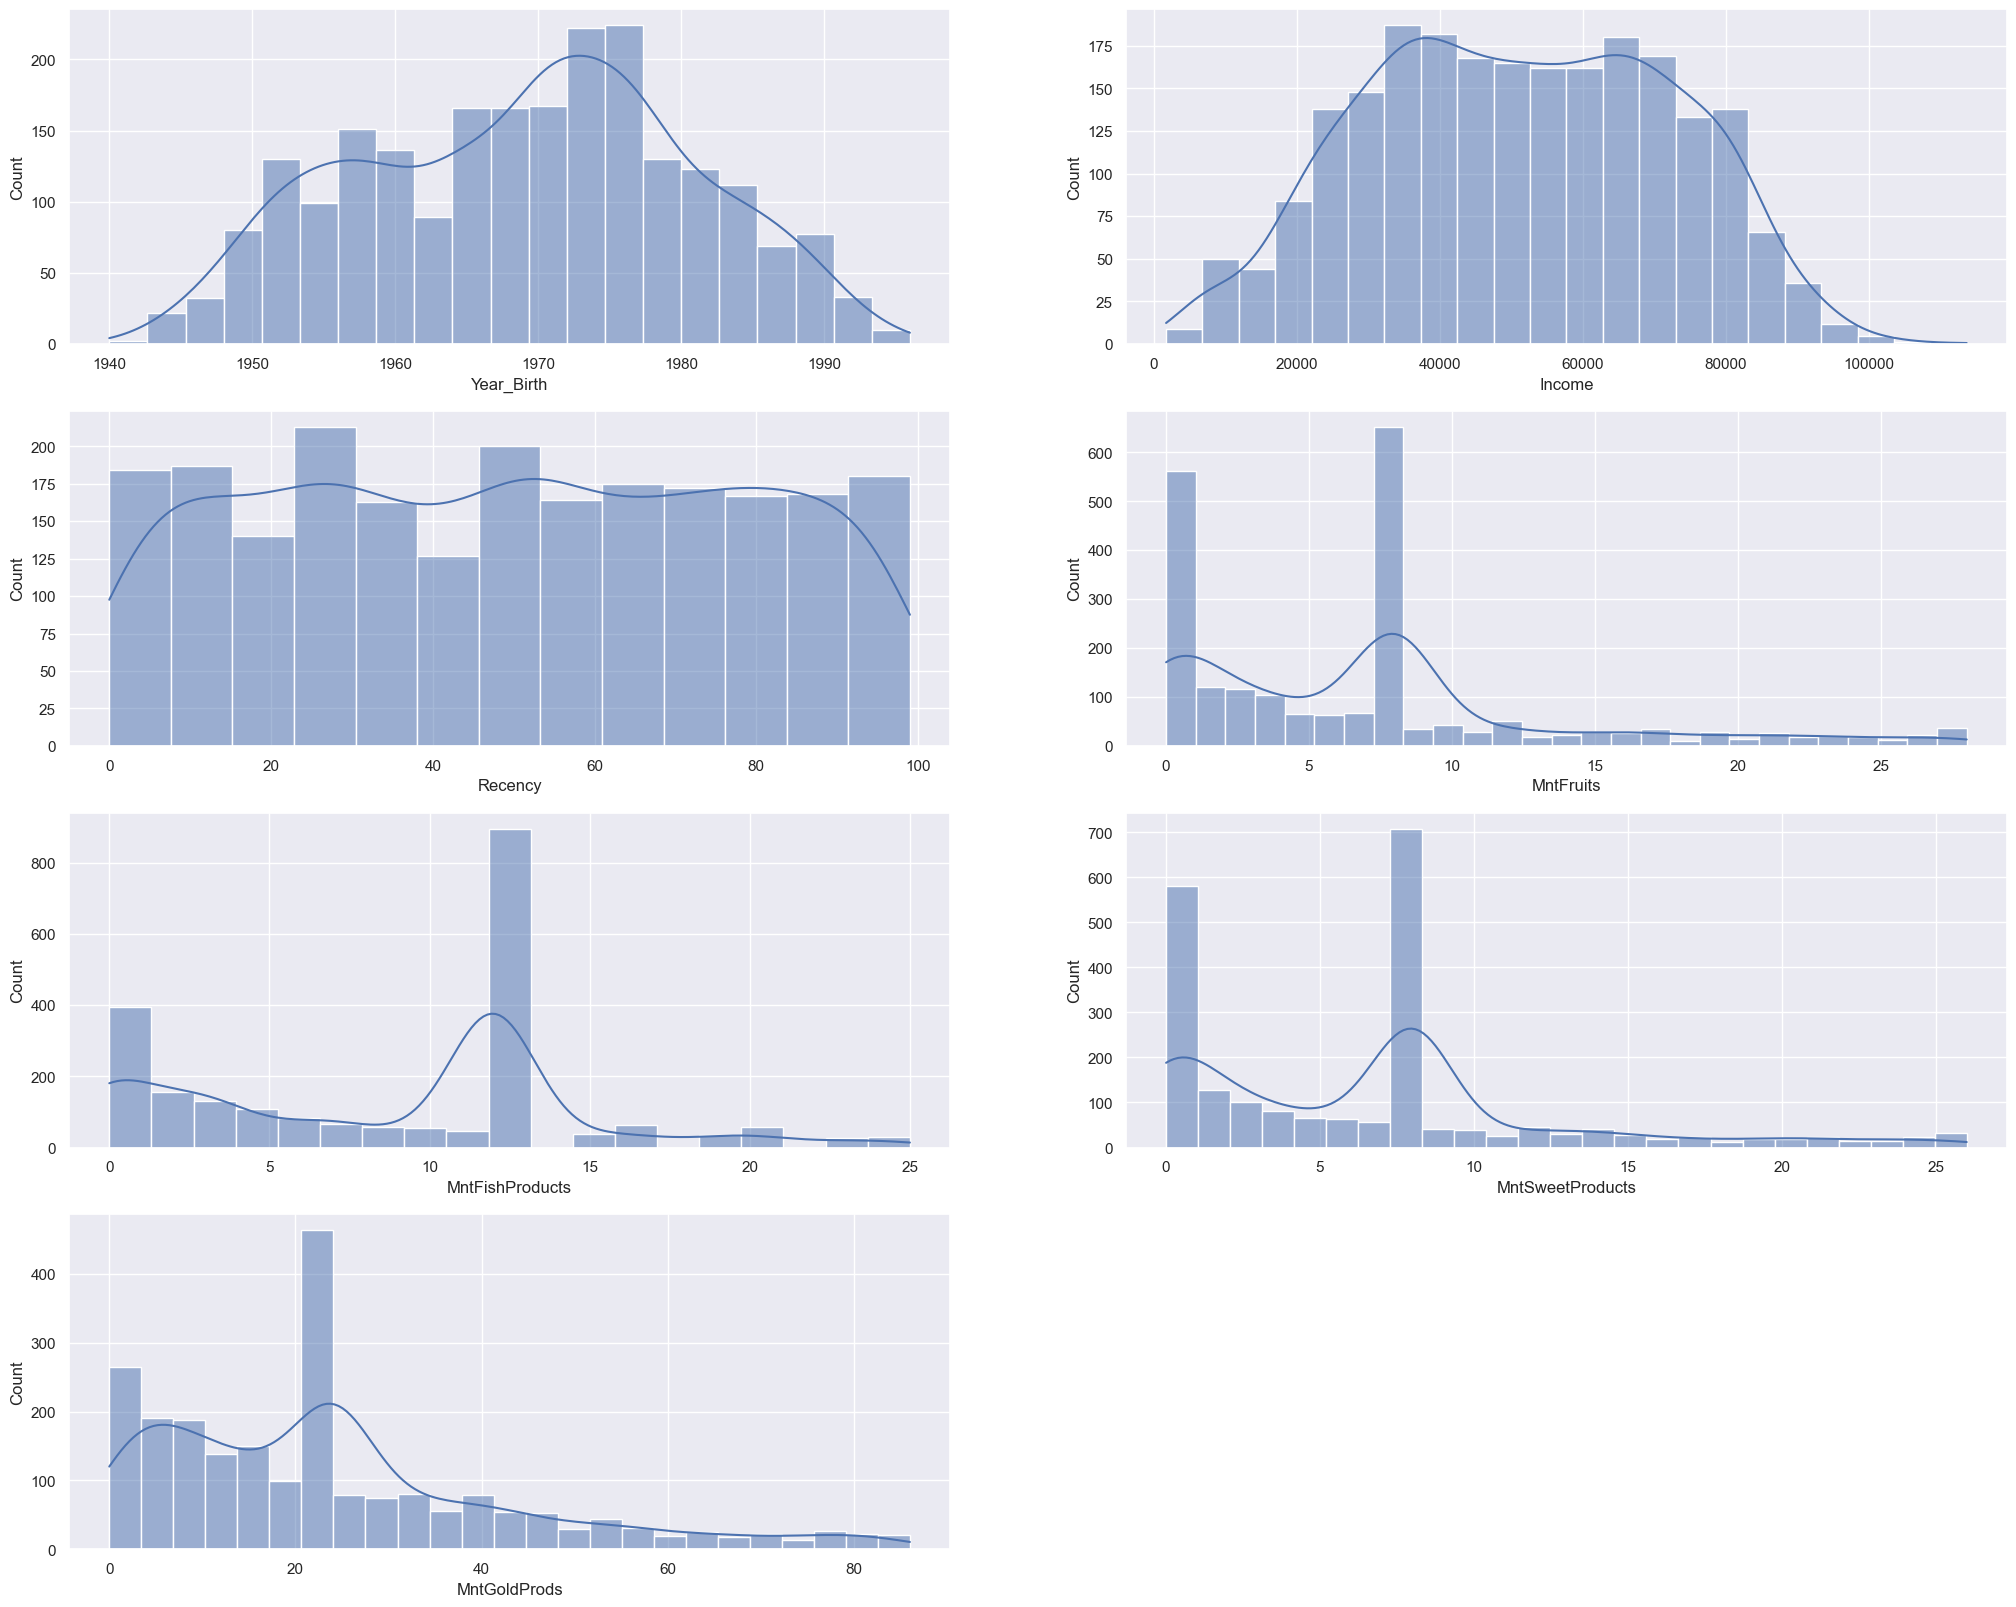

In [105]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(4,2,1)
sns.histplot(df['Year_Birth'], kde = True)

plt.subplot(4,2,2)
sns.histplot(df['Income'], kde = True)

plt.subplot(4,2,3)
sns.histplot(df['Recency'], kde = True)

plt.subplot(4,2,4)
sns.histplot(df['MntFruits'], kde = True)

plt.subplot(4,2,5)
sns.histplot(df['MntFishProducts'], kde = True)

plt.subplot(4,2,6)
sns.histplot(df['MntSweetProducts'], kde = True)

plt.subplot(4,2,7)
sns.histplot(df['MntGoldProds'], kde = True)

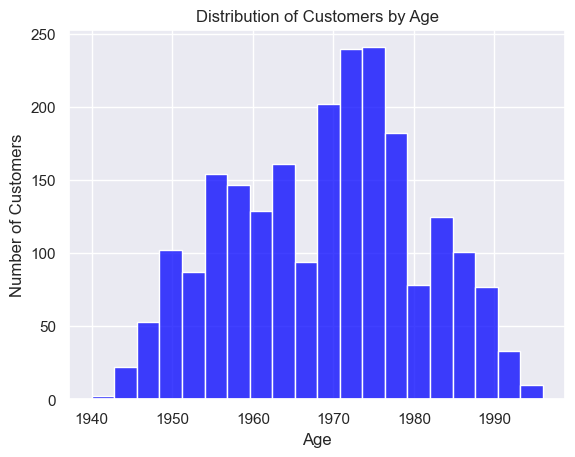

In [97]:

sns.histplot (df['Year_Birth'], bins=20, kde=False, color='blue')

plt.title ('Distribution of Customers by Age')
plt.xlabel ('Age')
plt.ylabel ('Number of Customers')


plt.show ()


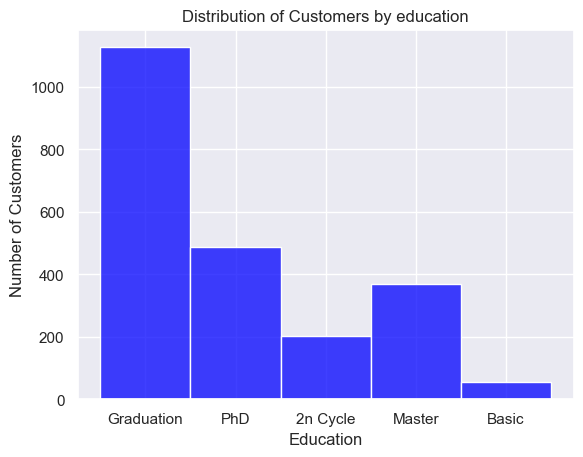

In [98]:
sns.histplot (df['Education'], bins=20, kde=False, color='blue')

plt.title ('Distribution of Customers by education')
plt.xlabel ('Education')
plt.ylabel ('Number of Customers')


plt.show ()

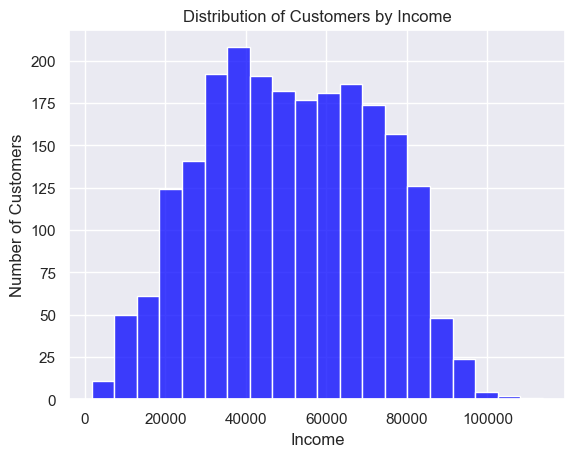

In [99]:
sns.histplot (df['Income'], bins=20, kde=False, color='blue')

plt.title ('Distribution of Customers by Income')
plt.xlabel ('Income')
plt.ylabel ('Number of Customers')

plt.show ()

In [100]:

average_income = df['Income'].mean ()

print ('The average income of customers is:', average_income)

The average income of customers is: 51158.782589285714


# Hypothesis Testing

In [101]:

accepted_offer_data = df[df['Response'] == 1]['Income']
not_accepted_offer_data = df[df['Response'] == 0]['Income']

# Perform F-test
f_stat, p_value = stats.f_oneway(accepted_offer_data, not_accepted_offer_data)

print(f'F-statistic: {f_stat}')
print(f'p-value: {p_value}')


F-statistic: 72.2130549352272
p-value: 3.4711383724593876e-17


In [102]:
# Filter data for customers who accepted and did not accept the offer
accepted_offer_data = df[df['Response'] == 1]['Income']
not_accepted_offer_data = df[df['Response'] == 0]['Income']

# Perform t-test
t_stat, p_value = stats.ttest_ind(accepted_offer_data, not_accepted_offer_data)

print(f'T-statistic: {t_stat}')
print(f'p-value: {p_value}')


T-statistic: 8.497826483003001
p-value: 3.471138372460605e-17


In [103]:
# Create a contingency table
contingency_table = pd.crosstab(df['Response'], df['Complain'])

# Perform Chi-Square test
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print(f'Chi-square statistic: {chi2}')
print(f'p-value: {p_value}')


Chi-square statistic: 0.0
p-value: 1.0
